# MGPGG Analysis Functionality

## Imports

In [1]:
import pandas as pd
from analysis_utils import (gen_avg_invest_per_group_per_treatment_list, 
                            gen_first_period_list,
                            gen_investment_avg_invest_per_period,
                            gen_avg_invest_plots,
                            gen_invest_subsets,
                            gen_avg_investment_per_participant_all_treatments,
                            gen_gender_split,
                            gen_data_panel_ols)
from stat_tests_utils import (gen_t_stat,
                              gen_tukey_test,
                              gen_kruskal_wallis_and_conover_iman)
from regression_utils import (gen_panel_ols)

## Code Test

### Read Data

In [2]:
mgpggdf = pd.read_csv('/Users/aaronberman/Desktop/DA_4_MGPGG/src/zBigData/mgpgg_df_all_sessions.csv')

/var/folders/ry/bf84d3cd54jctn_cwy_5666m0000gn/T/ipykernel_49590/463833470.py:1: DtypeWarning: Columns (215,216) have mixed types. Specify dtype option on import or set low_memory=False.
  mgpggdf = pd.read_csv('/Users/aaronberman/Desktop/DA_4_MGPGG/src/zBigData/mgpgg_df_all_sessions.csv')


In [ ]:
mgpggdf

### Avg Invest per treatment 

In [3]:
avg_list = gen_avg_invest_per_group_per_treatment_list(mgpggdf)
avg_list

[{'treatment': 'single',
  'average_investment': 8.705625,
  'investment_std': 6.261667002916205},
 {'treatment': 'split',
  'avg_blue_investment': 4.45625,
  'std_blue': 3.353932986666462,
  'avg_green_investment': 4.41,
  'std_green': 3.3166285616020956,
  'avg_both': 8.86625,
  'std_both': 3.3348917829707996},
 {'treatment': 'shared',
  'avg_blue_investment': 6.78,
  'std_blue': 5.680274284527741,
  'avg_green_investment': 4.5875,
  'std_green': 4.263209248404869,
  'avg_both': 11.3675,
  'std_both': 5.139502939562342}]

### Avg invest 1st period

In [5]:
first_period_avg_invest = gen_first_period_list(mgpggdf)
first_period_avg_invest

[{'treatment': 'single',
  'average_investment': 10.2375,
  'investment_std': 5.263304420012347},
 {'treatment': 'split',
  'avg_blue_investment': 6.3375,
  'std_blue': 2.6764029800073836,
  'avg_green_investment': 6.2625,
  'std_green': 2.6564645296838343,
  'avg_both': 12.600000000000001,
  'std_both': 2.658320271650254},
 {'treatment': 'shared',
  'avg_blue_investment': 6.875,
  'std_blue': 3.300843773984641,
  'avg_green_investment': 6.3625,
  'std_green': 2.8562334673925305,
  'avg_both': 13.2375,
  'std_both': 3.08755235741006}]

In [ ]:
# Tukey test (on first period contribution)

condition_single = (mgpggdf['pgg_treatment_applied'] == 'single') & (mgpggdf['subsession.round_number'] == 1)
single_first_period_investment = mgpggdf.loc[condition_single, 'player.investment'].to_list()

condition_split = (mgpggdf['pgg_treatment_applied'] == 'split') & (mgpggdf['subsession.round_number'] == 1)
split_first_period_investment = mgpggdf.loc[condition_split, ['player.blue_group_investment', 'player.green_group_investment']]
split_first_period_investment['player.investment'] = split_first_period_investment['player.blue_group_investment'] + split_first_period_investment['player.green_group_investment']
split_first_list = split_first_period_investment['player.investment'].to_list()

condition_shared = (mgpggdf['pgg_treatment_applied'] == 'shared') & (mgpggdf['subsession.round_number'] == 1)
shared_first_period_investment = mgpggdf.loc[condition_shared, ['player.blue_group_investment', 'player.green_group_investment']]
shared_first_period_investment['player.investment'] = shared_first_period_investment['player.blue_group_investment'] + shared_first_period_investment['player.green_group_investment']
shared_first_list = shared_first_period_investment['player.investment'].to_list()
shared_first_list

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
shared single     -3.0 0.0009 -4.9343 -1.0657   True
shared  split  -0.6375 0.7173 -2.5718  1.2968  False
single  split   2.3625  0.012  0.4282  4.2968   True
----------------------------------------------------


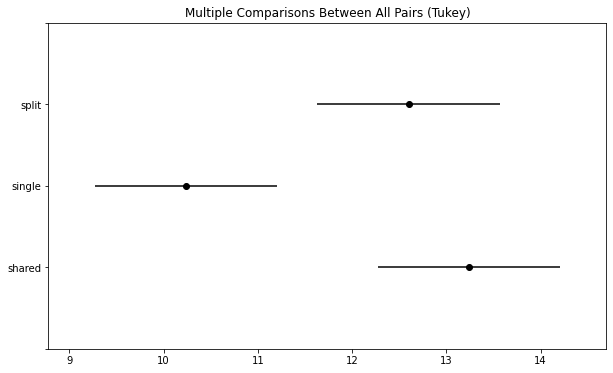

In [24]:
gen_tukey_test(single_first_period_investment, split_first_list, shared_first_list)

# Avg invest per period

In [25]:
singlePP = gen_investment_avg_invest_per_period(mgpggdf, 'single')
singlePP

{'period_1': 10.2375,
 'period_2': 11.625,
 'period_3': 11.8625,
 'period_4': 10.6875,
 'period_5': 9.875,
 'period_6': 10.35,
 'period_7': 8.7,
 'period_8': 8.8625,
 'period_9': 8.8375,
 'period_10': 8.0625,
 'period_11': 8.9,
 'period_12': 8.9375,
 'period_13': 7.9375,
 'period_14': 7.5375,
 'period_15': 7.8375,
 'period_16': 7.175,
 'period_17': 7.075,
 'period_18': 7.1125,
 'period_19': 6.45,
 'period_20': 6.05}

In [26]:
splitBlue, splitGreen, splitPP = gen_investment_avg_invest_per_period(mgpggdf, 'split')
splitPP

{'period_1': 12.600000000000001,
 'period_2': 12.9,
 'period_3': 12.225000000000001,
 'period_4': 10.875,
 'period_5': 10.6125,
 'period_6': 10.2875,
 'period_7': 9.5625,
 'period_8': 9.4625,
 'period_9': 7.625,
 'period_10': 9.025,
 'period_11': 9.1125,
 'period_12': 7.5625,
 'period_13': 7.1875,
 'period_14': 6.925,
 'period_15': 6.7125,
 'period_16': 7.237500000000001,
 'period_17': 7.225,
 'period_18': 6.4125,
 'period_19': 7.2125,
 'period_20': 6.5625}

In [27]:
sharedBlue, sharedGreen, sharedPP = gen_investment_avg_invest_per_period(mgpggdf, 'shared')
sharedPP

{'period_1': 13.2375,
 'period_2': 14.625,
 'period_3': 14.2,
 'period_4': 13.8875,
 'period_5': 13.2875,
 'period_6': 12.212499999999999,
 'period_7': 12.825,
 'period_8': 12.625,
 'period_9': 12.0,
 'period_10': 10.925,
 'period_11': 10.325,
 'period_12': 10.5,
 'period_13': 10.0875,
 'period_14': 10.625,
 'period_15': 10.3375,
 'period_16': 10.100000000000001,
 'period_17': 9.5625,
 'period_18': 9.2375,
 'period_19': 8.95,
 'period_20': 7.8}

#### Plots 

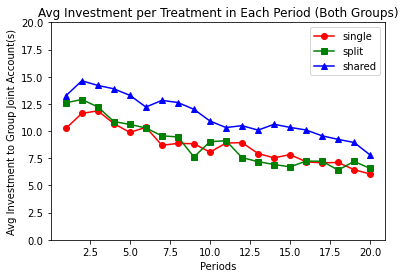

In [28]:
gen_avg_invest_plots(mgpggdf, singlePP, splitPP, sharedPP)

# Grouped Period Avgs

In [29]:
singleTrend = gen_invest_subsets(singlePP)
singleTrend

{'period_1': 10.2375,
 'period_2_to_10': 9.87361111111111,
 'period_11_to_20': 7.501249999999999}

In [30]:
splitTrend = gen_invest_subsets(splitPP)
splitTrend

{'period_1': 12.600000000000001,
 'period_2_to_10': 10.286111111111113,
 'period_11_to_20': 7.215000000000001}

In [31]:
sharedTrend = gen_invest_subsets(sharedPP)
sharedTrend

{'period_1': 13.2375,
 'period_2_to_10': 12.954166666666667,
 'period_11_to_20': 9.7525}

# Avg Invest Per Participant

In [32]:
single_per_participant, split_per_participant, shared_per_participant = gen_avg_investment_per_participant_all_treatments(mgpggdf)

In [14]:
single_per_participant

participant.code
02yoiini     1.50
0j7kfhln    12.20
3glo2sut    14.35
3k4ystev    11.00
3t1yd76e     4.80
            ...  
yk6lhwal     6.10
zah11a93    13.65
zlggycpg     7.00
ztrzsad5     5.20
zu546g9a     7.90
Name: player.investment, Length: 80, dtype: float64

In [15]:
split_per_participant

participant.code
0ann0bvh     8.20
23a2mmhm    10.55
2kukmydw     8.50
2pdifgop     1.40
3ujhueug     8.35
            ...  
y9eborjq     0.00
yx3p0b6v     7.35
zelu4yvk    12.20
znwkezuw    10.40
zx92uamy     7.70
Length: 80, dtype: float64

In [16]:
shared_per_participant

participant.code
0wj4te8u    20.00
14prhddm    19.95
1e0xptl3     8.45
1ef36mxh     6.05
29tlrw6l    15.40
            ...  
zjk0f1ye    12.00
zkquw8f4    10.30
zl7cdh1u    10.40
znlu9jpg    12.40
zq928mn2    13.35
Length: 80, dtype: float64

## Statistical Test

### t-tests

In [17]:
singleSplitTTest = gen_t_stat(single_per_participant, split_per_participant)

t-statistic: -0.26651769340755815
p-value: 0.7902117308991055
Fail to reject the null hypothesis: No evidence that the means are different


In [18]:
splitSharedTTest = gen_t_stat(split_per_participant, shared_per_participant)

t-statistic: -3.718599195105081
p-value: 0.0002922879250957225
Reject the null hypothesis: The means are different


In [19]:
singleSharedTTest = gen_t_stat(single_per_participant, shared_per_participant)

t-statistic: -3.5980649841252768
p-value: 0.00043157425359019404
Reject the null hypothesis: The means are different


#### Testing Period 1, Period 2- 10, versus Period 11-20 for Shared (one-way anova)

In [34]:
from scipy.stats import f_oneway

In [42]:
mgpggdf['player.summed_invest'] = mgpggdf['player.blue_group_investment'] + mgpggdf['player.green_group_investment']
 
# For List 1
shared_p1 = mgpggdf.loc[(mgpggdf['pgg_treatment_applied'] == 'shared') & (mgpggdf['subsession.round_number'] == 1)].groupby('participant.code')['player.summed_invest'].mean().tolist()

# For List 2
shared_p2_to_p10 = mgpggdf.loc[(mgpggdf['pgg_treatment_applied'] == 'shared') & (mgpggdf['subsession.round_number'] >= 2) & (mgpggdf['subsession.round_number'] <= 10)].groupby('participant.code')['player.summed_invest'].mean().tolist()

# For List 3
shared_p11_to_p20 = mgpggdf.loc[(mgpggdf['pgg_treatment_applied'] == 'shared') & (mgpggdf['subsession.round_number'] >= 11) & (mgpggdf['subsession.round_number'] <= 20)].groupby('participant.code')['player.summed_invest'].mean().tolist()

In [ ]:
shared_p1

In [46]:
f_oneway(shared_p1, shared_p2_to_p10, shared_p11_to_p20)

F_onewayResult(statistic=10.531915836087203, pvalue=4.149662339595633e-05)

#### Testing Blue vs Green for SHARED

In [55]:
filtered_df = mgpggdf[mgpggdf['pgg_treatment_applied'] == 'shared']
blue_avg_per_period = filtered_df.groupby('subsession.round_number')['player.blue_group_investment'].mean()
green_avg_per_period = filtered_df.groupby('subsession.round_number')['player.blue_group_investment'].mean()
green_avg_per_period = filtered_df.groupby('subsession.round_number')['player.green_group_investment'].mean()
green_avg_per_period

subsession.round_number
1     6.3625
2     6.5875
3     6.4500
4     5.8625
5     5.2250
6     4.9125
7     5.3125
8     4.9500
9     4.5250
10    3.8375
11    4.0625
12    4.2375
13    4.0125
14    4.4500
15    4.4000
16    4.0250
17    3.5125
18    3.1875
19    3.2250
20    2.6125
Name: player.green_group_investment, dtype: float64

In [56]:
blue_versus_green_shared = gen_t_stat(blue_avg_per_period, green_avg_per_period)

t-statistic: 6.827697092555737
p-value: 5.372093057471538e-08
Reject the null hypothesis: The means are different


### Tukey mult comparison

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
shared single  -2.6619 0.0003 -4.2516 -1.0721   True
shared  split  -2.5012 0.0008  -4.091 -0.9115   True
single  split   0.1606 0.9692 -1.4291  1.7504  False
----------------------------------------------------


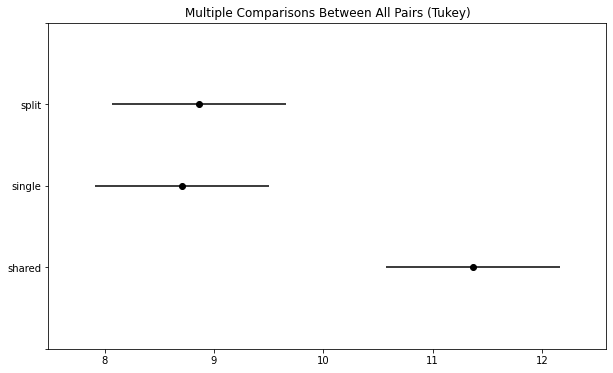

In [33]:
gen_tukey_test(single_per_participant, split_per_participant, shared_per_participant)

### Non-parametric multiple comparison

In [21]:
gen_kruskal_wallis_and_conover_iman(single_per_participant, split_per_participant, shared_per_participant)

Kruskal-Wallis H-test statistic: 17.739860195976302
P-value: 0.00014055241222744451
Conover-Iman posthoc test with Bonferroni adjustment:
          shared  single     split
shared  1.000000  0.0002  0.002346
single  0.000200  1.0000  1.000000
split   0.002346  1.0000  1.000000


### Gender Difference

In [22]:
femaleDf, maleDf = gen_gender_split(mgpggdf)

In [23]:
genderTStat, genderPValue = gen_t_stat(femaleDf, maleDf)

t-statistic: -0.7096966706334112
p-value: 0.47906360731436126
Fail to reject the null hypothesis: No evidence that the means are different


## Regressions

### panel ols

In [24]:
indices = ['participant.code', 'subsession.round_number']
depVarSingle = 'player.investment'
indepVar = ['RoumdIndep']

In [25]:
singleData = mgpggdf.loc[:, ['pgg_treatment_applied','participant.code', 'player.investment', 'subsession.round_number'] ]
singleData = singleData.loc[singleData['pgg_treatment_applied'] == 'single']
singleData['RoumdIndep'] = singleData['subsession.round_number']
singleData

,pgg_treatment_applied,participant.code,player.investment,subsession.round_number,RoumdIndep
0,single,byr62fae,12.0,1,1
1,single,byr62fae,16.0,2,2
2,single,byr62fae,20.0,3,3
3,single,byr62fae,20.0,4,4
4,single,byr62fae,20.0,5,5
...,...,...,...,...,...
1595,single,3k4ystev,10.0,16,16
1596,single,3k4ystev,10.0,17,17
1597,single,3k4ystev,0.0,18,18
1598,single,3k4ystev,0.0,19,19


In [26]:
singleRegression = gen_panel_ols(singleData,indices, depVarSingle, indepVar)

                          PanelOLS Estimation Summary                           
Dep. Variable:      player.investment   R-squared:                        0.1090
Estimator:                   PanelOLS   R-squared (Between):           -2.22e-16
No. Observations:                1600   R-squared (Within):               0.1090
Date:                Thu, Sep 28 2023   R-squared (Overall):              0.0587
Time:                        15:45:34   Log-likelihood                   -4617.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      185.81
Entities:                          80   P-value                           0.0000
Avg Obs:                       20.000   Distribution:                  F(1,1519)
Min Obs:                       20.000                                           
Max Obs:                       20.000   F-statistic (robust):             185.81
                            

In [27]:
indices = ['participant.code', 'subsession.round_number']
depVarSingle = 'player.personal_account'
indepVar = ['RoumdIndep']

In [28]:
sharedData = mgpggdf.loc[:, ['pgg_treatment_applied','participant.code', 'player.personal_account', 'subsession.round_number'] ]
sharedData = sharedData.loc[sharedData['pgg_treatment_applied'] == 'shared']
sharedData['RoumdIndep'] = sharedData['subsession.round_number']
sharedData

,pgg_treatment_applied,participant.code,player.personal_account,subsession.round_number,RoumdIndep
3200,shared,znlu9jpg,6.0,1,1
3201,shared,znlu9jpg,2.0,2,2
3202,shared,znlu9jpg,5.0,3,3
3203,shared,znlu9jpg,8.0,4,4
3204,shared,znlu9jpg,12.0,5,5
...,...,...,...,...,...
4795,shared,w9zef9ad,5.0,16,16
4796,shared,w9zef9ad,4.0,17,17
4797,shared,w9zef9ad,6.0,18,18
4798,shared,w9zef9ad,4.0,19,19


In [29]:
sharedRegression = gen_panel_ols(sharedData,indices, depVarSingle, indepVar)

                             PanelOLS Estimation Summary                             
Dep. Variable:     player.personal_account   R-squared:                        0.1538
Estimator:                        PanelOLS   R-squared (Between):            1.11e-16
No. Observations:                     1600   R-squared (Within):               0.1538
Date:                     Thu, Sep 28 2023   R-squared (Overall):              0.0702
Time:                             15:45:43   Log-likelihood                   -4576.6
Cov. Estimator:                 Unadjusted                                           
                                             F-statistic:                      276.03
Entities:                               80   P-value                           0.0000
Avg Obs:                            20.000   Distribution:                  F(1,1519)
Min Obs:                            20.000                                           
Max Obs:                            20.000   F-statist

In [29]:
#panelData = gen_data_panel_ols(mgpggdf, indices, depVarSingle,indepVar)

## Regressions Testing

In [98]:
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
from linearmodels.panel import PooledOLS
import numpy as np

In [129]:
regression_data = pd.read_csv('/Users/aaronberman/Desktop/DA_4_MGPGG/src/zBigData/mgpgg_df_all_sessions.csv')

/var/folders/ry/bf84d3cd54jctn_cwy_5666m0000gn/T/ipykernel_49590/261814915.py:1: DtypeWarning: Columns (215,216) have mixed types. Specify dtype option on import or set low_memory=False.
  regression_data = pd.read_csv('/Users/aaronberman/Desktop/DA_4_MGPGG/src/zBigData/mgpgg_df_all_sessions.csv')


In [100]:
regression_data

,Unnamed: 0,pgg_treatment_applied,participant.id_in_session,participant.code,participant.payoff,player.id_in_group,player.payoff,player.investment,player.personal_account,player.indiv_share,...,player.clarity,player.suggestions,player.start_time_survey,player.time_spent_survey_one,player.time_spent_survey_two,player.time_spent_survey_three,player.time_spent_survey_four,player.compare_groups,player.reasoning,player.signaling
0,0,single,1,byr62fae,1190.0,1,34.0,12.0,8.0,26.0,...,4.0,I didn't have a full understanding of how bein...,1.694195e+09,279.378000,37.599659,18.820385,69.987730,NaN,NaN,NaN
1,1,single,1,byr62fae,1190.0,1,37.0,16.0,4.0,33.0,...,4.0,I didn't have a full understanding of how bein...,1.694195e+09,279.378000,37.599659,18.820385,69.987730,NaN,NaN,NaN
2,2,single,1,byr62fae,1190.0,1,38.0,20.0,0.0,38.0,...,4.0,I didn't have a full understanding of how bein...,1.694195e+09,279.378000,37.599659,18.820385,69.987730,NaN,NaN,NaN
3,3,single,1,byr62fae,1190.0,1,40.0,20.0,0.0,40.0,...,4.0,I didn't have a full understanding of how bein...,1.694195e+09,279.378000,37.599659,18.820385,69.987730,NaN,NaN,NaN
4,4,single,1,byr62fae,1190.0,1,40.0,20.0,0.0,40.0,...,4.0,I didn't have a full understanding of how bein...,1.694195e+09,279.378000,37.599659,18.820385,69.987730,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,4795,shared,16,w9zef9ad,939.0,16,31.0,NaN,5.0,NaN,...,3.0,None,1.695935e+09,253.511639,22.543194,13.628525,8.111268,I invested in groups with equal contributions ...,NaN,NaN
4796,4796,shared,16,w9zef9ad,939.0,16,30.0,NaN,4.0,NaN,...,3.0,None,1.695935e+09,253.511639,22.543194,13.628525,8.111268,I invested in groups with equal contributions ...,NaN,NaN
4797,4797,shared,16,w9zef9ad,939.0,16,33.0,NaN,6.0,NaN,...,3.0,None,1.695935e+09,253.511639,22.543194,13.628525,8.111268,I invested in groups with equal contributions ...,NaN,NaN
4798,4798,shared,16,w9zef9ad,939.0,16,29.0,NaN,4.0,NaN,...,3.0,None,1.695935e+09,253.511639,22.543194,13.628525,8.111268,I invested in groups with equal contributions ...,NaN,NaN


In [130]:
# Cross treatment comparison regression | sum contributions for multi-group sessions and compare to baseline

regression_data.loc[regression_data['player.investment'].isna(), 'player.investment'] = regression_data['player.blue_group_investment'] + regression_data['player.green_group_investment']
regression_data.loc[regression_data['player.tot_invest'].isna(), 'player.tot_invest'] = regression_data['player.blue_group_total_investment'] + regression_data['player.green_group_total_investment']

In [131]:
regression_data = regression_data.drop('Unnamed: 0', axis=1)
regression_data

,pgg_treatment_applied,participant.id_in_session,participant.code,participant.payoff,player.id_in_group,player.payoff,player.investment,player.personal_account,player.indiv_share,player.tot_invest,...,player.clarity,player.suggestions,player.start_time_survey,player.time_spent_survey_one,player.time_spent_survey_two,player.time_spent_survey_three,player.time_spent_survey_four,player.compare_groups,player.reasoning,player.signaling
0,single,1,byr62fae,1190.0,1,34.0,12.0,8.0,26.0,52.0,...,4.0,I didn't have a full understanding of how bein...,1.694195e+09,279.378000,37.599659,18.820385,69.987730,NaN,NaN,NaN
1,single,1,byr62fae,1190.0,1,37.0,16.0,4.0,33.0,66.0,...,4.0,I didn't have a full understanding of how bein...,1.694195e+09,279.378000,37.599659,18.820385,69.987730,NaN,NaN,NaN
2,single,1,byr62fae,1190.0,1,38.0,20.0,0.0,38.0,76.0,...,4.0,I didn't have a full understanding of how bein...,1.694195e+09,279.378000,37.599659,18.820385,69.987730,NaN,NaN,NaN
3,single,1,byr62fae,1190.0,1,40.0,20.0,0.0,40.0,80.0,...,4.0,I didn't have a full understanding of how bein...,1.694195e+09,279.378000,37.599659,18.820385,69.987730,NaN,NaN,NaN
4,single,1,byr62fae,1190.0,1,40.0,20.0,0.0,40.0,80.0,...,4.0,I didn't have a full understanding of how bein...,1.694195e+09,279.378000,37.599659,18.820385,69.987730,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,shared,16,w9zef9ad,939.0,16,31.0,15.0,5.0,NaN,51.0,...,3.0,None,1.695935e+09,253.511639,22.543194,13.628525,8.111268,I invested in groups with equal contributions ...,NaN,NaN
4796,shared,16,w9zef9ad,939.0,16,30.0,16.0,4.0,NaN,51.0,...,3.0,None,1.695935e+09,253.511639,22.543194,13.628525,8.111268,I invested in groups with equal contributions ...,NaN,NaN
4797,shared,16,w9zef9ad,939.0,16,33.0,14.0,6.0,NaN,53.0,...,3.0,None,1.695935e+09,253.511639,22.543194,13.628525,8.111268,I invested in groups with equal contributions ...,NaN,NaN
4798,shared,16,w9zef9ad,939.0,16,29.0,16.0,4.0,NaN,50.0,...,3.0,None,1.695935e+09,253.511639,22.543194,13.628525,8.111268,I invested in groups with equal contributions ...,NaN,NaN


In [132]:
regression_data['player.max_invest'] = np.where(regression_data['player.blue_group_investment'] > regression_data['player.green_group_investment'], 
                                        regression_data['player.blue_group_investment'], 
                                        regression_data['player.green_group_investment'])

In [133]:
regression_data['player.min_invest'] = np.where(regression_data['player.blue_group_investment'] < regression_data['player.green_group_investment'], 
                                        regression_data['player.blue_group_investment'], 
                                        regression_data['player.green_group_investment'])

In [134]:
regression_data['max_invest_group'] = np.where(
    regression_data['player.blue_group_investment'] > regression_data['player.green_group_investment'], 
    'blue', 
    'green'
)

regression_data['group_max_invest'] = np.where(
    regression_data['max_invest_group'] == 'blue',
    regression_data['player.blue_group_total_investment'],
    regression_data['player.green_group_total_investment']
)

regression_data['min_invest_group'] = np.where(
    regression_data['player.blue_group_investment'] > regression_data['player.green_group_investment'], 
    'green', 
    'blue'
)

regression_data['group_min_invest'] = np.where(
    regression_data['min_invest_group'] == 'blue',
    regression_data['player.blue_group_total_investment'],
    regression_data['player.green_group_total_investment']
)

In [135]:
regression_data.columns = regression_data.columns.str.replace('.', '_')
regression_data

/var/folders/ry/bf84d3cd54jctn_cwy_5666m0000gn/T/ipykernel_49590/3719066534.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  regression_data.columns = regression_data.columns.str.replace('.', '_')


,pgg_treatment_applied,participant_id_in_session,participant_code,participant_payoff,player_id_in_group,player_payoff,player_investment,player_personal_account,player_indiv_share,player_tot_invest,...,player_time_spent_survey_four,player_compare_groups,player_reasoning,player_signaling,player_max_invest,player_min_invest,max_invest_group,group_max_invest,min_invest_group,group_min_invest
0,single,1,byr62fae,1190.0,1,34.0,12.0,8.0,26.0,52.0,...,69.987730,NaN,NaN,NaN,NaN,NaN,green,NaN,blue,NaN
1,single,1,byr62fae,1190.0,1,37.0,16.0,4.0,33.0,66.0,...,69.987730,NaN,NaN,NaN,NaN,NaN,green,NaN,blue,NaN
2,single,1,byr62fae,1190.0,1,38.0,20.0,0.0,38.0,76.0,...,69.987730,NaN,NaN,NaN,NaN,NaN,green,NaN,blue,NaN
3,single,1,byr62fae,1190.0,1,40.0,20.0,0.0,40.0,80.0,...,69.987730,NaN,NaN,NaN,NaN,NaN,green,NaN,blue,NaN
4,single,1,byr62fae,1190.0,1,40.0,20.0,0.0,40.0,80.0,...,69.987730,NaN,NaN,NaN,NaN,NaN,green,NaN,blue,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,shared,16,w9zef9ad,939.0,16,31.0,15.0,5.0,NaN,51.0,...,8.111268,I invested in groups with equal contributions ...,NaN,NaN,8.0,7.0,green,27.0,blue,24.0
4796,shared,16,w9zef9ad,939.0,16,30.0,16.0,4.0,NaN,51.0,...,8.111268,I invested in groups with equal contributions ...,NaN,NaN,8.0,8.0,green,28.0,blue,23.0
4797,shared,16,w9zef9ad,939.0,16,33.0,14.0,6.0,NaN,53.0,...,8.111268,I invested in groups with equal contributions ...,NaN,NaN,8.0,6.0,green,27.0,blue,26.0
4798,shared,16,w9zef9ad,939.0,16,29.0,16.0,4.0,NaN,50.0,...,8.111268,I invested in groups with equal contributions ...,NaN,NaN,8.0,8.0,green,24.0,blue,26.0


In [106]:
regression_data.to_csv('mgpgg_regression_data.csv', index=False)

In [ ]:
regression_data = regression_data.set_index(['participant.code', 'subsession.round_number'])

model = PanelOLS.from_formula('player.investment ~ C(pgg_treatment_applied, Treatment(reference="single")) + EntityEffects + TimeEffects', regression_data)

results = model.fit()

print(results)

/Users/aaronberman/Desktop/DA_4_MGPGG/src/Analysis/mgpgg_regression_data.csv

## Min-Max Figure

In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
mgpggdf['player.max_invest'] = np.where(mgpggdf['player.blue_group_investment'] > mgpggdf['player.green_group_investment'], 
                                        mgpggdf['player.blue_group_investment'], 
                                        mgpggdf['player.green_group_investment'])
mgpggdf['player.max_invest'] 


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
4795     8.0
4796     8.0
4797     8.0
4798     8.0
4799    10.0
Name: player.max_invest, Length: 4800, dtype: float64

In [107]:
mgpggdf['max_invest_group'] = np.where(
    mgpggdf['player.blue_group_investment'] > mgpggdf['player.green_group_investment'], 
    'blue', 
    'green'
)

In [121]:
mgpggdf['max_invest_group'] = np.where(
    mgpggdf['player.blue_group_investment'] > mgpggdf['player.green_group_investment'], 
    'blue', 
    'green'
)

mgpggdf['group_max_invest'] = np.where(
    mgpggdf['max_invest_group'] == 'blue',
    mgpggdf['player.blue_group_total_investment'],
    mgpggdf['player.green_group_total_investment']
)

mgpggdf['min_invest_group'] = np.where(
    mgpggdf['player.blue_group_investment'] > mgpggdf['player.green_group_investment'], 
    'green', 
    'blue'
)

mgpggdf['group_min_invest'] = np.where(
    mgpggdf['min_invest_group'] == 'blue',
    mgpggdf['player.blue_group_total_investment'],
    mgpggdf['player.green_group_total_investment']
)

In [71]:
combined_avg_max = mgpggdf[mgpggdf['pgg_treatment_applied'].isin(['shared', 'split'])].groupby('subsession.round_number')['player.max_invest'].mean()

# Average for shared only
shared_avg_max = mgpggdf[mgpggdf['pgg_treatment_applied'] == 'shared'].groupby('subsession.round_number')['player.max_invest'].mean()

# Average for split only
split_avg_max = mgpggdf[mgpggdf['pgg_treatment_applied'] == 'split'].groupby('subsession.round_number')['player.max_invest'].mean()

In [60]:
mgpggdf['player.min_invest'] = np.where(mgpggdf['player.blue_group_investment'] < mgpggdf['player.green_group_investment'], 
                                        mgpggdf['player.blue_group_investment'], 
                                        mgpggdf['player.green_group_investment'])
mgpggdf['player.min_invest']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
4795     7.0
4796     8.0
4797     6.0
4798     8.0
4799    10.0
Name: player.min_invest, Length: 4800, dtype: float64

In [122]:
mgpggdf['min_invest_group'] = np.where(
    mgpggdf['player.blue_group_investment'] > mgpggdf['player.green_group_investment'], 
    'green', 
    'blue'
)

In [126]:
mgpggdf['group_min_invest'] = np.where(
    mgpggdf['min_invest_group'] == 'blue',
    mgpggdf['player.blue_group_total_investment'],
    mgpggdf['player.green_group_total_investment']
)

In [127]:
mgpggdf

,Unnamed: 0,pgg_treatment_applied,participant.id_in_session,participant.code,participant.payoff,player.id_in_group,player.payoff,player.investment,player.personal_account,player.indiv_share,...,player.compare_groups,player.reasoning,player.signaling,player.summed_invest,player.max_invest,player.min_invest,max_invest_group,group_max_invest,min_invest_group,group_min_invest
0,0,single,1,byr62fae,1190.0,1,34.0,12.0,8.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,green,NaN,blue,NaN
1,1,single,1,byr62fae,1190.0,1,37.0,16.0,4.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,green,NaN,blue,NaN
2,2,single,1,byr62fae,1190.0,1,38.0,20.0,0.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,green,NaN,blue,NaN
3,3,single,1,byr62fae,1190.0,1,40.0,20.0,0.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,green,NaN,blue,NaN
4,4,single,1,byr62fae,1190.0,1,40.0,20.0,0.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,green,NaN,blue,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,4795,shared,16,w9zef9ad,939.0,16,31.0,NaN,5.0,NaN,...,I invested in groups with equal contributions ...,NaN,NaN,15.0,8.0,7.0,green,27.0,blue,24.0
4796,4796,shared,16,w9zef9ad,939.0,16,30.0,NaN,4.0,NaN,...,I invested in groups with equal contributions ...,NaN,NaN,16.0,8.0,8.0,green,28.0,blue,23.0
4797,4797,shared,16,w9zef9ad,939.0,16,33.0,NaN,6.0,NaN,...,I invested in groups with equal contributions ...,NaN,NaN,14.0,8.0,6.0,green,27.0,blue,26.0
4798,4798,shared,16,w9zef9ad,939.0,16,29.0,NaN,4.0,NaN,...,I invested in groups with equal contributions ...,NaN,NaN,16.0,8.0,8.0,green,24.0,blue,26.0


In [72]:
combined_avg_min = mgpggdf[mgpggdf['pgg_treatment_applied'].isin(['shared', 'split'])].groupby('subsession.round_number')['player.min_invest'].mean()

# Average for shared only
shared_avg_min = mgpggdf[mgpggdf['pgg_treatment_applied'] == 'shared'].groupby('subsession.round_number')['player.min_invest'].mean()

# Average for split only
split_avg_min = mgpggdf[mgpggdf['pgg_treatment_applied'] == 'split'].groupby('subsession.round_number')['player.min_invest'].mean()

([<matplotlib.axis.XTick at 0x7fe4b1899640>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

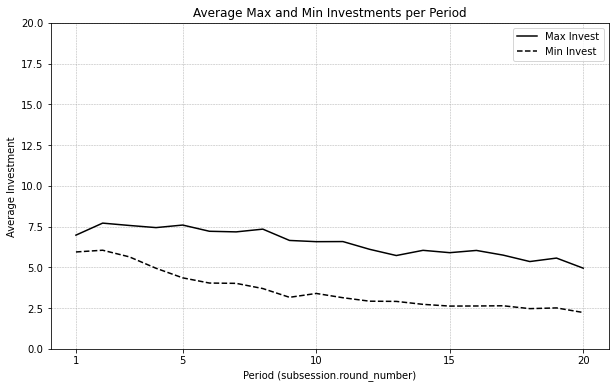

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(combined_avg_max, label='Max Invest', color='black', linestyle='-')
plt.plot(combined_avg_min, label='Min Invest', color='black', linestyle='--')
plt.title('Average Max and Min Investments per Period')
plt.xlabel('Period (subsession.round_number)')
plt.ylabel('Average Investment')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(0,20)
# Adjust x-axis to show only whole numbers
plt.xticks([1, 5, 10, 15, 20])

([<matplotlib.axis.XTick at 0x7fe490d3a7f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

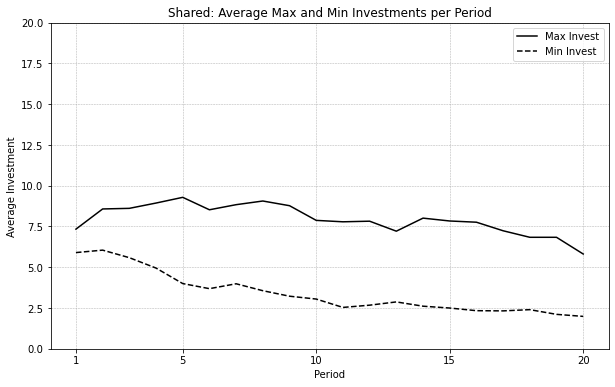

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(shared_avg_max, label='Max Invest', color='black', linestyle='-')
plt.plot(shared_avg_min, label='Min Invest', color='black', linestyle='--')
plt.title('Shared: Average Max and Min Investments per Period')
plt.xlabel('Period')
plt.ylabel('Average Investment')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(0,20)
# Adjust x-axis to show only whole numbers
plt.xticks([1, 5, 10, 15, 20])

([<matplotlib.axis.XTick at 0x7fe4b18a3190>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

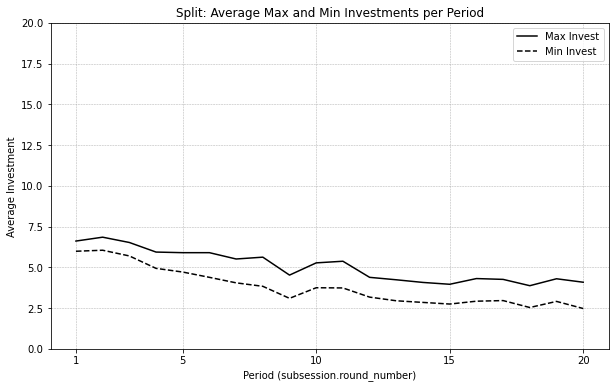

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(split_avg_max, label='Max Invest', color='black', linestyle='-')
plt.plot(split_avg_min, label='Min Invest', color='black', linestyle='--')
plt.title('Split: Average Max and Min Investments per Period')
plt.xlabel('Period')
plt.ylabel('Average Investment')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(0,20)
# Adjust x-axis to show only whole numbers
plt.xticks([1, 5, 10, 15, 20])

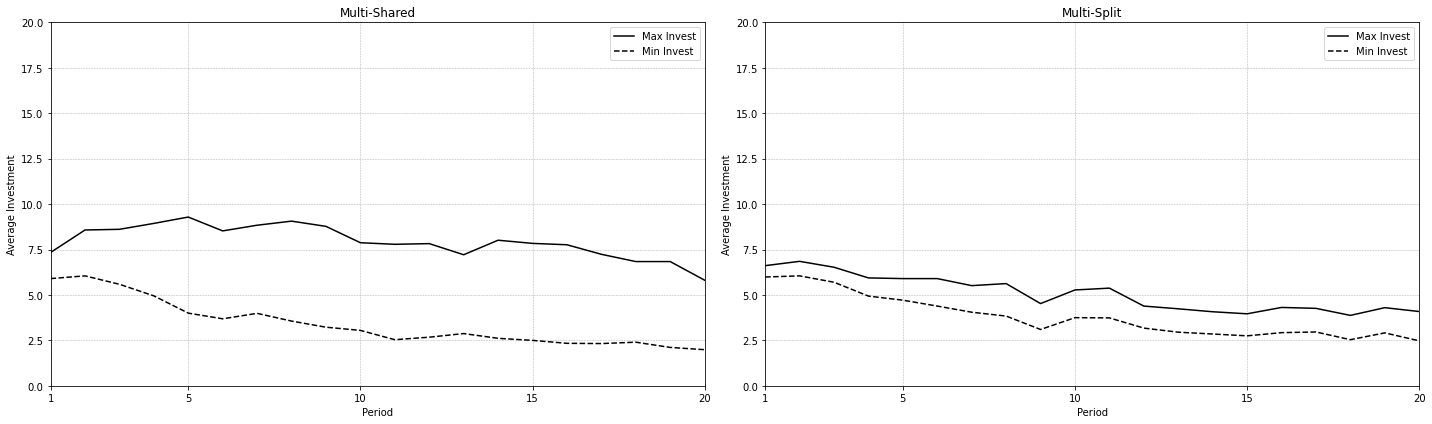

In [92]:
# Start the plotting
plt.figure(figsize=(20, 6))  

# First subplot for 'shared'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(shared_avg_max, label='Max Invest', color='black', linestyle='-')
plt.plot(shared_avg_min, label='Min Invest', color='black', linestyle='--')
plt.title('Multi-Shared')
plt.xlabel('Period')
plt.ylabel('Average Investment')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(0,20)
plt.xlim(1,20)
plt.xticks([1, 5, 10, 15, 20])

# Second subplot for 'split'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(split_avg_max, label='Max Invest', color='black', linestyle='-')
plt.plot(split_avg_min, label='Min Invest', color='black', linestyle='--')
plt.title('Multi-Split')
plt.xlabel('Period')
plt.ylabel('Average Investment')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(0,20)
plt.xlim(1,20)
plt.xticks([1, 5, 10, 15, 20])

plt.tight_layout()  # Adjusts the spacing between the plots
plt.show()
